In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load dataset

In [3]:
dataFile = "Dataset/Mall_Customers.csv"

rawData = pd.read_csv(dataFile)
df = pd.DataFrame(rawData)

df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.dropna()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
x = df.iloc[:, [3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

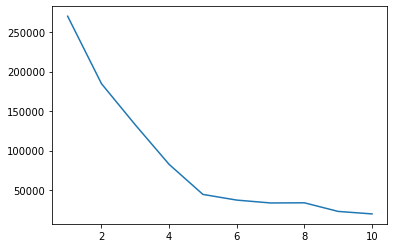

In [8]:
x = df.iloc[:, [3,4]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)

plt.show()

/home/cskushal18/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


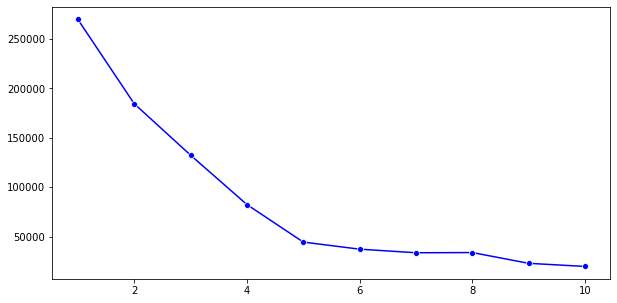

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(range(1, 11), wcss, marker='o', color='blue')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(x)

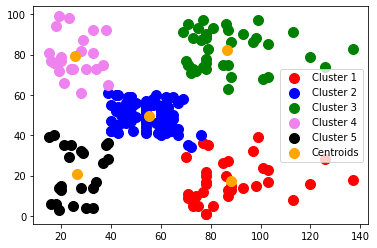

In [19]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s= 100, c="red", label="Cluster 1")
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s= 100, c="blue", label="Cluster 2")
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s= 100, c="green", label="Cluster 3")
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s= 100, c="violet", label="Cluster 4")
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s= 100, c="black", label="Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color='orange', label="Centroids")

plt.legend()

<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

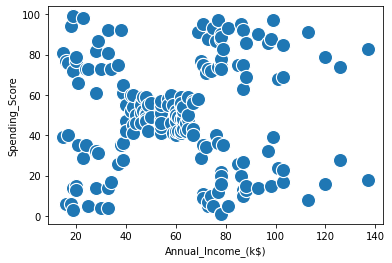

In [27]:
sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score", data=rawData, s=200)

<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

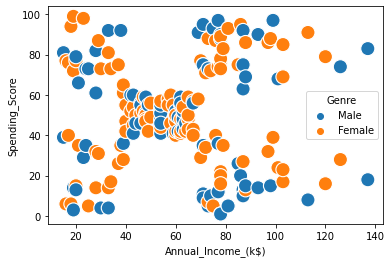

In [28]:
sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score", data=rawData, s=200, hue='Genre')